In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import corner
import copy
import pickle
from astropy.io import ascii
import time

%matplotlib inline

In [2]:
# from https://github.com/engineersportal/pylive

def live_plotter(x_vec,y1_data,line1,identifier='',pause_time=0.1):
    if line1==[]:
        # this is the call to matplotlib that allows dynamic plotting
        plt.ion()
        fig = plt.figure(figsize=(13,6))
        ax = fig.add_subplot(111)
        # create a variable for the line so we can later update it
        line1, = ax.plot(x_vec,y1_data,'-o',alpha=0.8)        
        #update plot label/title
        plt.ylabel('Y Label')
        plt.title('Title: {}'.format(identifier))
        plt.show()
    
    # after the figure, axis, and line are created, we only need to update the y-data
    line1.set_ydata(y1_data)
    # adjust limits if new data goes beyond bounds
    if np.min(y1_data)<=line1.axes.get_ylim()[0] or np.max(y1_data)>=line1.axes.get_ylim()[1]:
        plt.ylim([np.min(y1_data)-np.std(y1_data),np.max(y1_data)+np.std(y1_data)])
    # this pauses the data so the figure/axis can catch up - the amount of pause can be altered above
    plt.pause(pause_time)
    
    # return line so we can update it again in the next iteration
    return line1

# the function below is for updating both x and y values (great for updating dates on the x-axis)
def live_plotter_xy(x_vec,y1_data,line1,identifier='',pause_time=0.01):
    if line1==[]:
        plt.ion()
        fig = plt.figure(figsize=(13,6))
        ax = fig.add_subplot(111)
        line1, = ax.plot(x_vec,y1_data,'r-o',alpha=0.8)
        plt.ylabel('Y Label')
        plt.title('Title: {}'.format(identifier))
        plt.show()
        
    line1.set_data(x_vec,y1_data)
    plt.xlim(np.min(x_vec),np.max(x_vec))
    if np.min(y1_data)<=line1.axes.get_ylim()[0] or np.max(y1_data)>=line1.axes.get_ylim()[1]:
        plt.ylim([np.min(y1_data)-np.std(y1_data),np.max(y1_data)+np.std(y1_data)])

    plt.pause(pause_time)
    
    return line1

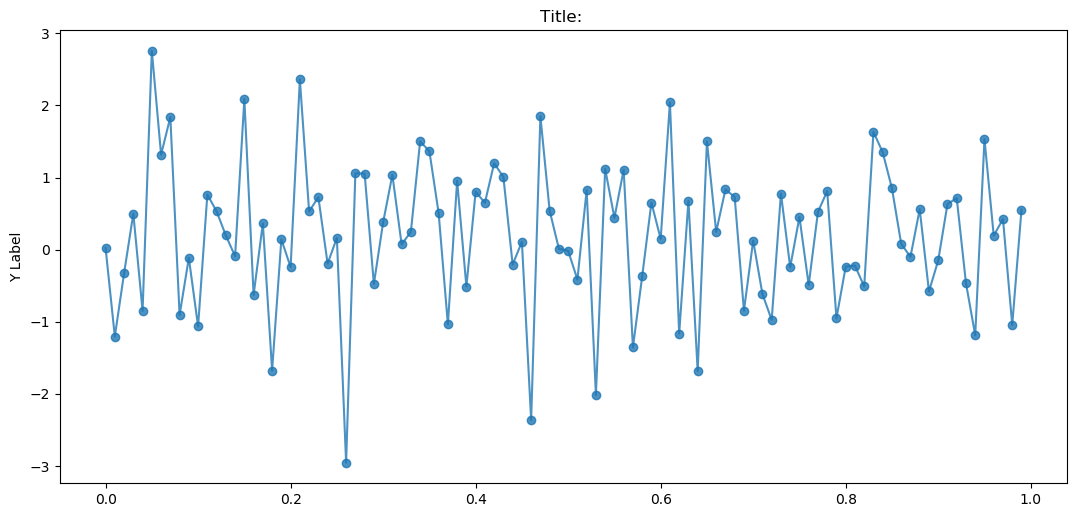

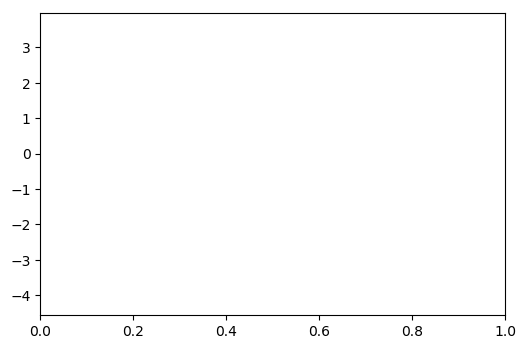

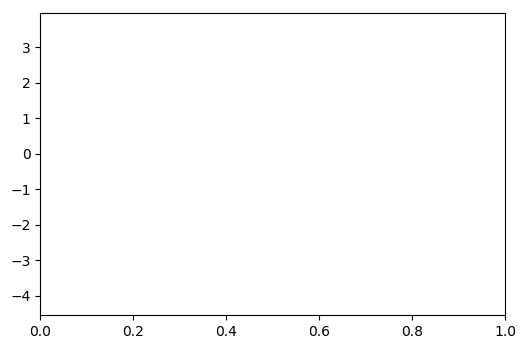

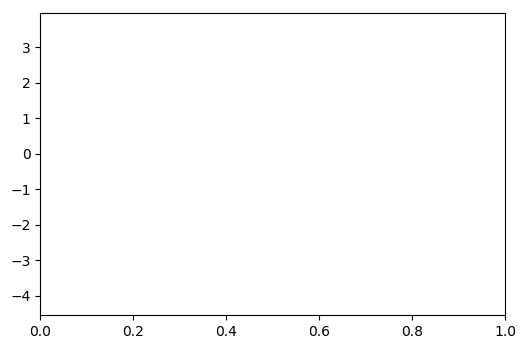

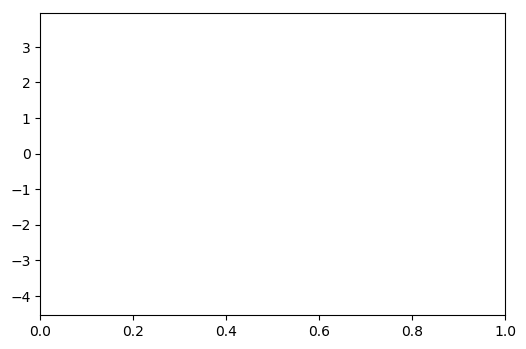

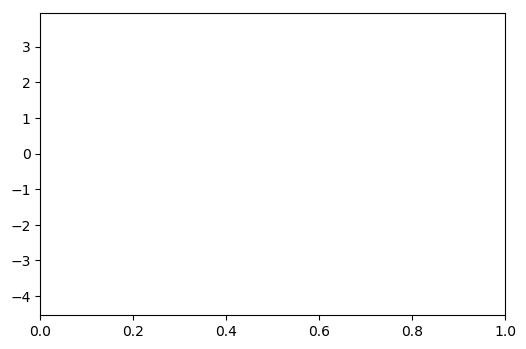

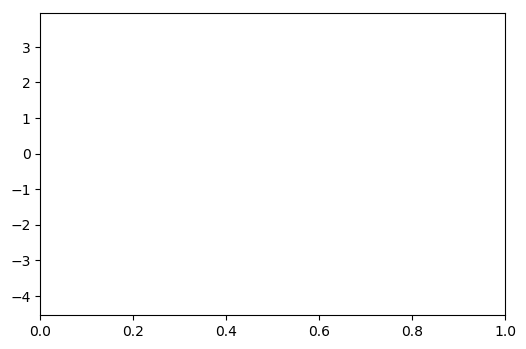

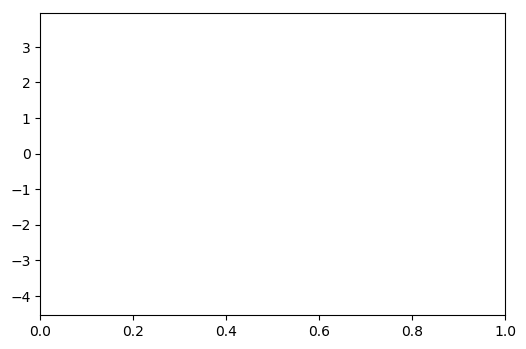

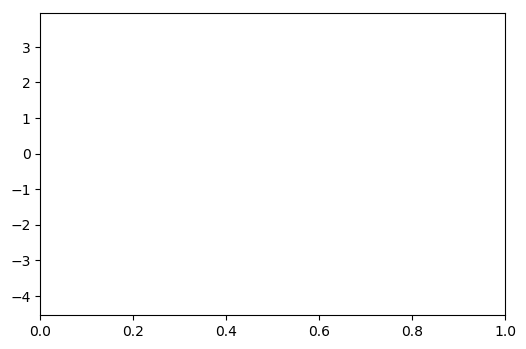

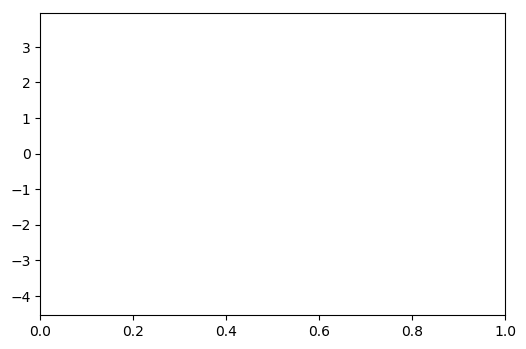

KeyboardInterrupt: 

In [3]:
size = 100
x_vec = np.linspace(0,1,size+1)[0:-1]
y_vec = np.random.randn(len(x_vec))
line1 = []
while True:
    rand_val = np.random.randn(1)
    y_vec[-1] = rand_val
    line1 = live_plotter(x_vec,y_vec,line1)
    y_vec = np.append(y_vec[1:],0.0)